In [1]:
!nvidia-smi

Sat May 28 16:06:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.15       Driver Version: 512.15       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   35C    P0    23W /  N/A |      0MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
import numpy as np
import torch
import random
import matplotlib.pyplot as plt

from tic_env import TictactoeEnv, OptimalPlayer
from DQN_utils import DQ_learner
from DQN_utils import SelfLearner

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

env = TictactoeEnv()

# Question 11

In this question, we train our network over 20000 games, with $\epsilon = 0.1$, opponent $\epsilon = 0.5$, and we switch the first player after every game

In [55]:
learner = DQ_learner(target_network_update=500, eps_min=0.1, eps_max=0.1)
env.reset()
losses, rewards = learner.train(number_games=20000, opponent_epsilon=.5, env=env)

Text(0, 0.5, 'reward')

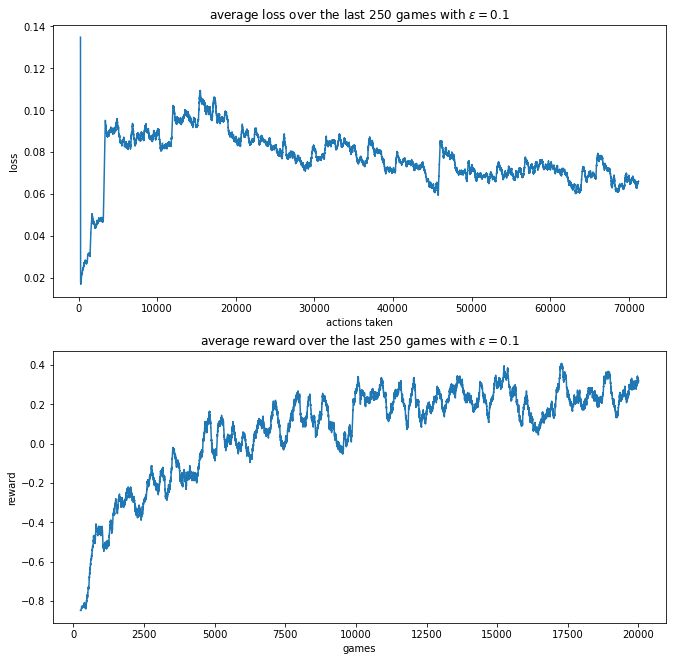

In [57]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(11, 11))
window_size = 250

losses_numpy = torch.stack([l for l in losses if l is not None]).cpu().detach().numpy()
n_losses = len(losses)
x = np.linspace(0, losses_numpy.shape[0], losses_numpy.shape[0])
ax1.plot((np.arange(n_losses-window_size+1)+window_size)[:70991], np.convolve(losses_numpy, np.ones(window_size), 'valid') / window_size)

n_games = len(rewards)
ax2.plot(np.arange(n_games-window_size+1)+window_size, np.convolve(rewards, np.ones(window_size), 'valid') / window_size)

ax1.set_title(r'average loss over the last 250 games with $\epsilon=0.1$')
ax1.set_xlabel('actions taken')
ax1.set_ylabel('loss')
ax2.set_title(r'average reward over the last 250 games with $\epsilon=0.1$')
ax2.set_xlabel('games')
ax2.set_ylabel('reward')

Here, we can observe that the loss consistently decreases after an initial stabilization period. This observation is backed up by the increase of the average reward (up to about 0.4), which shows that the network is indeed learning.

# Question 12

In this question, we repeat the experiment from question 11, but without a replay buffer (that is, the network is only trained on the datapoint corresponding to the previous action taken).

In [35]:
learner = DQ_learner(target_network_update=500, eps_min=0.1, eps_max=0.1, remove_buffer=True)
env.reset()
losses, rewards = learner.train(number_games=20000, opponent_epsilon=.5, env=env)

c:\Users\noam\epfl_courses\ANN\Miniproject1\ANN_miniproject\DQN_utils.py:150: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state_action_values = self.policy_net(last_transition.state[0].to(device))


Text(0, 0.5, 'reward')

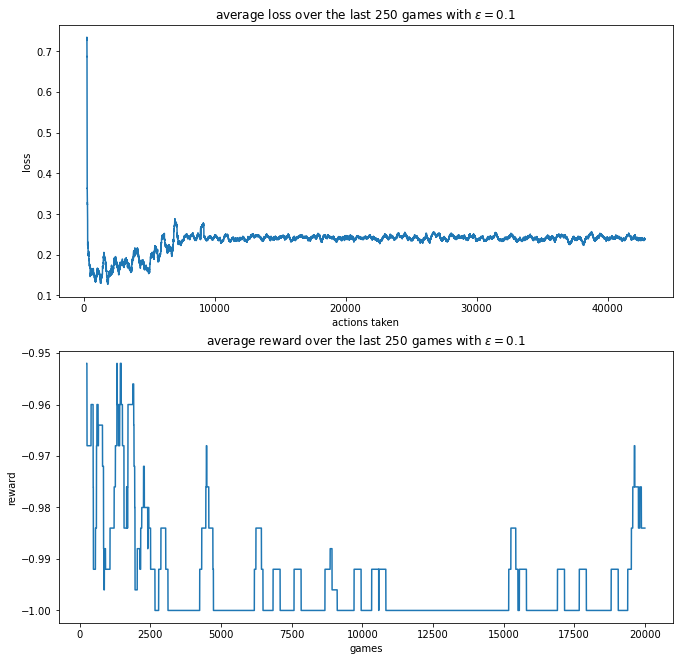

In [36]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(11, 11))
window_size = 250

losses_numpy = torch.stack([l for l in losses if l is not None]).cpu().detach().numpy()
n_losses = len(losses)
x = np.linspace(0, losses_numpy.shape[0], losses_numpy.shape[0])
ax1.plot((np.arange(n_losses-window_size+1)+window_size)[:70991], np.convolve(losses_numpy, np.ones(window_size), 'valid') / window_size)

n_games = len(rewards)
ax2.plot(np.arange(n_games-window_size+1)+window_size, np.convolve(rewards, np.ones(window_size), 'valid') / window_size)

ax1.set_title(r'average loss over the last 250 games with $\epsilon=0.1$')
ax1.set_xlabel('actions taken')
ax1.set_ylabel('loss')
ax2.set_title(r'average reward over the last 250 games with $\epsilon=0.1$')
ax2.set_xlabel('games')
ax2.set_ylabel('reward')

Here, we can observe that with a buffer and batch size of 1, the agent is unable to learn. This is what we would expect, since the rewards are absent of most of the "batches" on which the network learns (that is, the majority of the transitions are mid-game, and not final states, so there are no rewards to learn from). Also, as the targets (of the Bellman equation) vary a lot, it is expected that the average loss will remain constant.

# Question 13

In this question, we use a decaying epsilon (from 0.8 to 0.1), with severall decaying times.

In [62]:
learner1 = DQ_learner(target_network_update=500, eps_min=0.1, eps_max=0.8, decaying_time = 100)
env.reset()
losses1, rewards1, Mopt1, Mrand1 = learner1.train(number_games=20000, opponent_epsilon=.5, env=env, evaluate=True)

In [ ]:
learner2 = DQ_learner(target_network_update=500, eps_min=0.1, eps_max=0.8, decaying_time = 1000)
env.reset()
losses2, rewards2, Mopt2, Mrand2 = learner2.train(number_games=20000, opponent_epsilon=.5, env=env, evaluate=True)

In [79]:
learner3 = DQ_learner(target_network_update=500, eps_min=0.1, eps_max=0.8, decaying_time = 10000)
env.reset()
losses3, rewards3, Mopt3, Mrand3 = learner3.train(number_games=20000, opponent_epsilon=.5, env=env, evaluate=True)

In [ ]:
learner4 = DQ_learner(target_network_update=500, eps_min=0.1, eps_max=0.8, decaying_time = 20000)
env.reset()
losses4, rewards4, Mopt4, Mrand4 = learner4.train(number_games=20000, opponent_epsilon=.5, env=env, evaluate=True)

In [65]:
learner5 = DQ_learner(target_network_update=500, eps_min=0.1, eps_max=0.8, decaying_time = 19000)
env.reset()
losses5, rewards5, Mopt5, Mrand5 = learner5.train(number_games=20000, opponent_epsilon=.5, env=env, evaluate=True)

Text(0, 0.5, '$M_{rand}$')

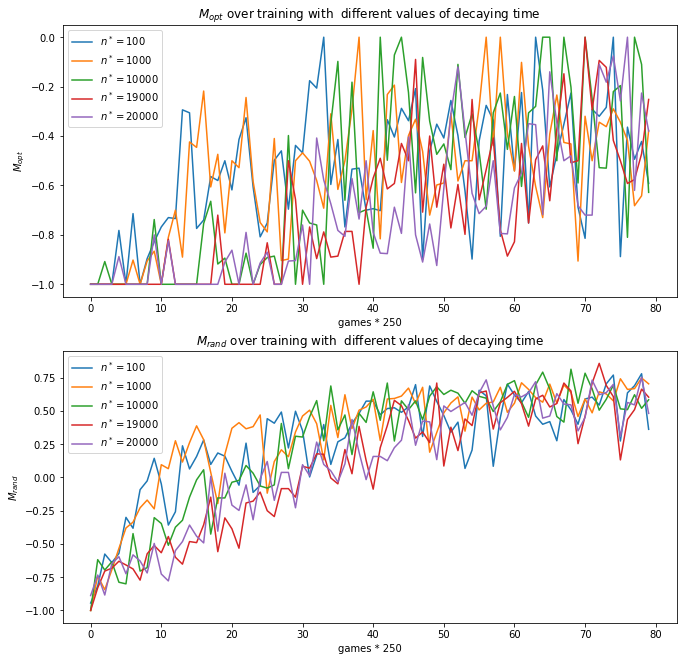

In [80]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(11, 11))

ax1.plot(range(len(Mopt1)), Mopt1, label=r'$n^*=${}'.format(100))
ax2.plot(range(len(Mrand1)), Mrand1, label=r'$n^*=${}'.format(100))

ax1.plot(range(len(Mopt2)), Mopt2, label=r'$n^*=${}'.format(1000))
ax2.plot(range(len(Mrand2)), Mrand2, label=r'$n^*=${}'.format(1000))

ax1.plot(range(len(Mopt3)), Mopt3, label=r'$n^*=${}'.format(10000))
ax2.plot(range(len(Mrand3)), Mrand3, label=r'$n^*=${}'.format(10000))

ax1.plot(range(len(Mopt5)), Mopt5, label=r'$n^*=${}'.format(19000))
ax2.plot(range(len(Mrand5)), Mrand5, label=r'$n^*=${}'.format(19000))

ax1.plot(range(len(Mopt4)), Mopt4, label=r'$n^*=${}'.format(20000))
ax2.plot(range(len(Mrand4)), Mrand4, label=r'$n^*=${}'.format(20000))

ax1.legend()
ax2.legend()
ax1.set_title(r'$M_{opt}$ over training with  different values of decaying time')
ax1.set_xlabel('games * 250')
ax1.set_ylabel('$M_{opt}$')
ax2.set_title(r'$M_{rand}$ over training with  different values of decaying time')
ax2.set_xlabel('games * 250')
ax2.set_ylabel('$M_{rand}$')

In [81]:
from DQN_utils import M_opt, M_rand
print('with n* = 100 : M_opt = ', M_opt(learner1, env), ', M_rand = ', M_rand(learner1, env))
print('with n* = 1000 : M_opt = ', M_opt(learner2, env), ', M_rand = ', M_rand(learner2, env))
print('with n* = 10000 : M_opt = ', M_opt(learner3, env), ', M_rand = ', M_rand(learner3, env))
print('with n* = 19000 : M_opt = ', M_opt(learner5, env), ', M_rand = ', M_rand(learner5, env))
print('with n* = 20000 : M_opt = ', M_opt(learner4, env), ', M_rand = ', M_rand(learner4, env))

with n* = 100 : M_opt =  -0.5 , M_rand =  0.688
with n* = 1000 : M_opt =  -0.774 , M_rand =  0.652
with n* = 10000 : M_opt =  -0.358 , M_rand =  0.794
with n* = 19000 : M_opt =  -0.72 , M_rand =  0.612
with n* = 20000 : M_opt =  -0.586 , M_rand =  0.516


We can observe that $M_rand$ trajectories with higher values of $n^*$ increase slower, but eventually they all reach roughly the same values. The $M_opt$ trajectories are better vizualized one at the time. Then we can see that the trajectory with $n^* = 10000$ seems to increase the most consistently, which is further confirmed by the final $M_opt$ value (which remains consistently the best of all, with values ranging from $-0.358$ to $0$). However, due to the high variances of these trajectories, it is possible that these results are only due to random fluctuations. One (ad hoc) explanation for the $n^* = 10000$ trajectory performing the best is that it makes the best compromise between the time spent explorating the state-action space and the time spent working out the optimal strategy.

# Question 14

Having observed that the best value for $n^*$ is 10000, we now try several values of epsilon for the opponent, to see how the agent behaves against them.

In [82]:
learner1 = DQ_learner(target_network_update=500, eps_min=0.1, eps_max=0.8, decaying_time = 10000)
env.reset()
losses1, rewards1, Mopt1, Mrand1 = learner1.train(number_games=20000, opponent_epsilon=.4, env=env, evaluate=True)

In [83]:
learner2 = DQ_learner(target_network_update=500, eps_min=0.1, eps_max=0.8, decaying_time = 10000)
env.reset()
losses2, rewards2, Mopt2, Mrand2 = learner2.train(number_games=20000, opponent_epsilon=.65, env=env, evaluate=True)

In [84]:
learner3 = DQ_learner(target_network_update=500, eps_min=0.1, eps_max=0.8, decaying_time = 10000)
env.reset()
losses3, rewards3, Mopt3, Mrand3 = learner3.train(number_games=20000, opponent_epsilon=.85, env=env, evaluate=True)

In [85]:
learner4 = DQ_learner(target_network_update=500, eps_min=0.1, eps_max=0.8, decaying_time = 10000)
env.reset()
losses4, rewards4, Mopt4, Mrand4 = learner4.train(number_games=20000, opponent_epsilon=.95, env=env, evaluate=True)

Text(0, 0.5, '$M_{rand}$')

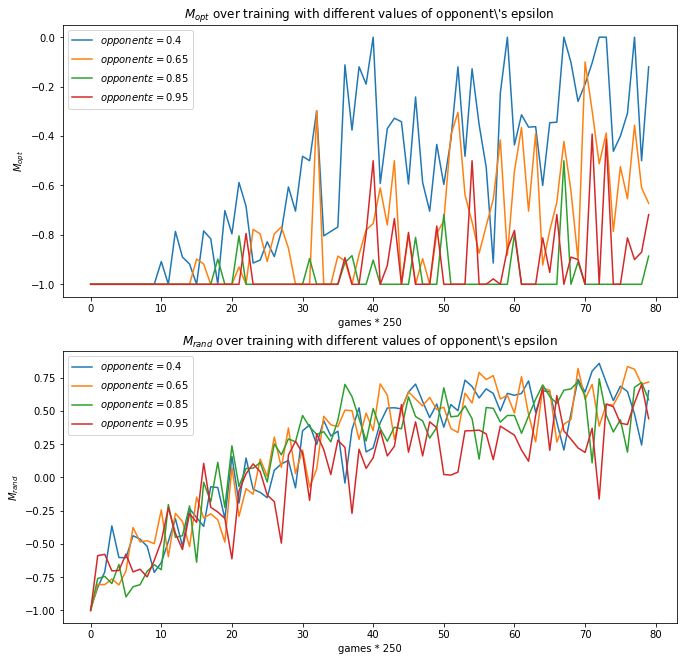

In [88]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(11, 11))

ax1.plot(range(len(Mopt1)), Mopt1, label=r'$opponent \epsilon=${}'.format(0.4))
ax2.plot(range(len(Mrand1)), Mrand1, label=r'$opponent \epsilon=${}'.format(0.4))

ax1.plot(range(len(Mopt2)), Mopt2, label=r'$opponent \epsilon=${}'.format(0.65))
ax2.plot(range(len(Mrand2)), Mrand2, label=r'$opponent \epsilon=${}'.format(0.65))

ax1.plot(range(len(Mopt3)), Mopt3, label=r'$opponent \epsilon=${}'.format(0.85))
ax2.plot(range(len(Mrand3)), Mrand3, label=r'$opponent \epsilon=${}'.format(0.85))

ax1.plot(range(len(Mopt4)), Mopt4, label=r'$opponent \epsilon=${}'.format(0.95))
ax2.plot(range(len(Mrand4)), Mrand4, label=r'$opponent \epsilon=${}'.format(0.95))

ax1.legend()
ax2.legend()
ax1.set_title(r'$M_{opt}$ over training with different values of opponent\'s epsilon')
ax1.set_xlabel('games * 250')
ax1.set_ylabel('$M_{opt}$')
ax2.set_title(r'$M_{rand}$ over training with different values of opponent\'s epsilon')
ax2.set_xlabel('games * 250')
ax2.set_ylabel('$M_{rand}$')

We can observe that higher values of epsilon for the teacher yield slightly worse results throughout training for $M_rand$. However, the difference appears to be a lot more important for $M_opt$, for which high values of epsilon for the teacher seem to completely impede learning. This is probably due to the fact that if the teacher always wins, then the agent gets no rewards.

# Question 15

# Self practice

In the following cells, we take a look at the behaviour of our self-learner, which learns by self practice :

In [9]:
self_learner = SelfLearner(target_network_update=500, eps_min=0.1, eps_max=0.8, decaying_time = 10000)
env.reset()
losses, rewards_X, rewards_O, Mopt, Mrand = self_learner.train(number_games=20000, env=env, evaluate=True)

Here, we take a look at M_opt and M_rand with $n^*$ = 10000

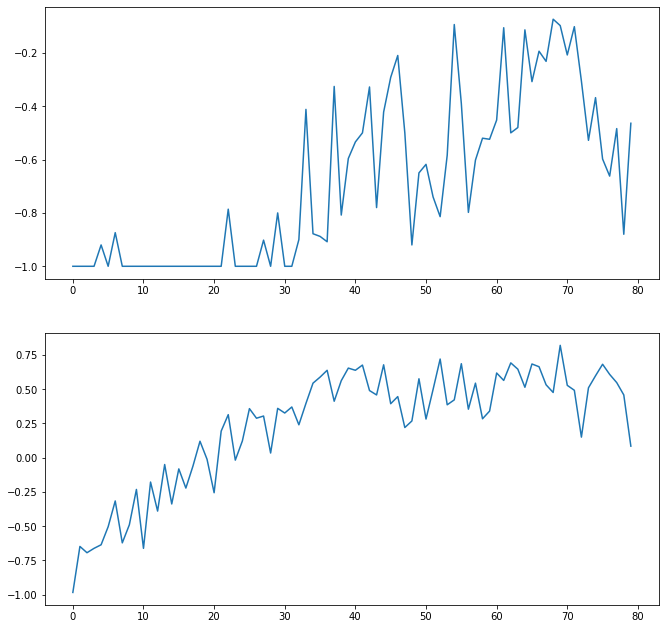

In [10]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(11, 11))

ax1.plot(range(len(Mopt)), Mopt, label='Mopt')
ax2.plot(range(len(Mrand)), Mrand, label='Mrand')

Here, we observe the average rewards (over 250 games) of both players, and the average loss :

Text(0, 0.5, 'reward')

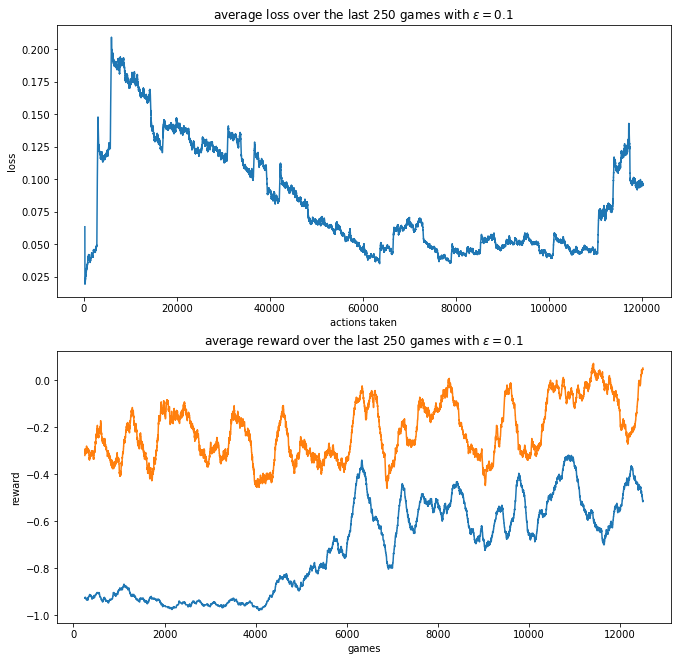

In [13]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(11, 11))
window_size = 250

losses_numpy = torch.stack([l for l in losses if l is not None]).cpu().detach().numpy()
n_losses = len(losses)
x = np.linspace(0, losses_numpy.shape[0], losses_numpy.shape[0])
ax1.plot((np.arange(n_losses-window_size+1)+window_size)[:119860], np.convolve(losses_numpy, np.ones(window_size), 'valid') / window_size)

n_games = len(rewards_X)
ax2.plot(np.arange(n_games-window_size+1)+window_size, np.convolve(rewards_X, np.ones(window_size), 'valid') / window_size)
ax2.plot(np.arange(n_games-window_size+1)+window_size, np.convolve(rewards_O, np.ones(window_size), 'valid') / window_size)

ax1.set_title(r'average loss over the last 250 games with $\epsilon=0.1$')
ax1.set_xlabel('actions taken')
ax1.set_ylabel('loss')
ax2.set_title(r'average reward over the last 250 games with $\epsilon=0.1$')
ax2.set_xlabel('games')
ax2.set_ylabel('reward')

# Question 16

Here, we train an agent against itself, with different values of $\epsilon$ :

In [14]:
self_learner1 = SelfLearner(target_network_update=500, eps_min=0.1, eps_max=0.1, decaying_time = 1)
env.reset()
losses1, _, _, Mopt1, Mrand1 = self_learner1.train(number_games=20000, env=env, evaluate=True)

In [15]:
self_learner2 = SelfLearner(target_network_update=500, eps_min=0.35, eps_max=0.35, decaying_time = 1)
env.reset()
losses2, _, _, Mopt2, Mrand2 = self_learner2.train(number_games=20000, env=env, evaluate=True)

In [16]:
self_learner3 = SelfLearner(target_network_update=500, eps_min=0.55, eps_max=0.55, decaying_time = 1)
env.reset()
losses3, _, _, Mopt3, Mrand3 = self_learner3.train(number_games=20000, env=env, evaluate=True)

In [17]:
self_learner4 = SelfLearner(target_network_update=500, eps_min=0.8, eps_max=0.8, decaying_time = 1)
env.reset()
losses4, _, _, Mopt4, Mrand4 = self_learner4.train(number_games=20000, env=env, evaluate=True)

Text(0, 0.5, '$M_{rand}$')

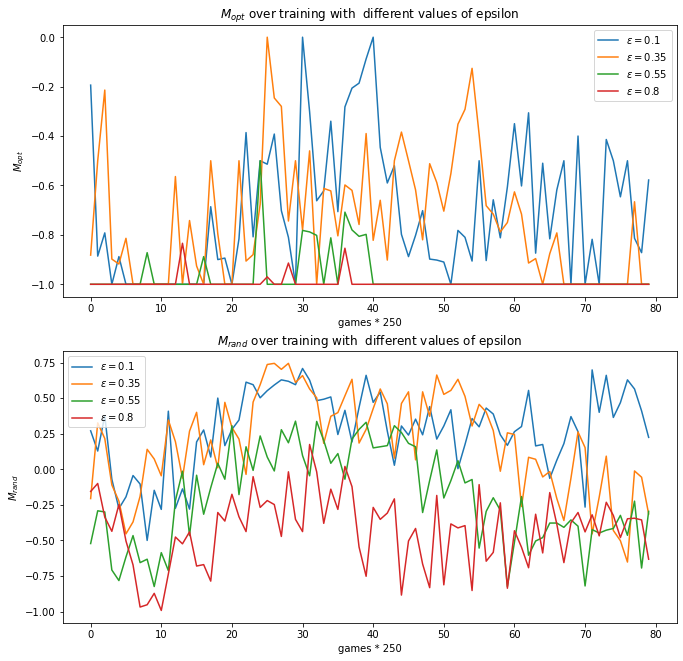

In [19]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(11, 11))

ax1.plot(range(len(Mopt1)), Mopt1, label=r'$\epsilon=${}'.format(0.1))
ax2.plot(range(len(Mrand1)), Mrand1, label=r'$\epsilon=${}'.format(0.1))

ax1.plot(range(len(Mopt2)), Mopt2, label=r'$\epsilon=${}'.format(0.35))
ax2.plot(range(len(Mrand2)), Mrand2, label=r'$\epsilon=${}'.format(0.35))

ax1.plot(range(len(Mopt3)), Mopt3, label=r'$\epsilon=${}'.format(0.55))
ax2.plot(range(len(Mrand3)), Mrand3, label=r'$\epsilon=${}'.format(0.55))

ax1.plot(range(len(Mopt4)), Mopt4, label=r'$\epsilon=${}'.format(0.8))
ax2.plot(range(len(Mrand4)), Mrand4, label=r'$\epsilon=${}'.format(0.8))


ax1.legend()
ax2.legend()
ax1.set_title(r'$M_{opt}$ over training with  different values of epsilon')
ax1.set_xlabel('games * 250')
ax1.set_ylabel('$M_{opt}$')
ax2.set_title(r'$M_{rand}$ over training with  different values of epsilon')
ax2.set_xlabel('games * 250')
ax2.set_ylabel('$M_{rand}$')

We can observe that both $M_{opt}$ and $M_{rand}$ are significantly higher for low values of $\epsilon$. This indicates that the agent learns poorly when trained on a majority of random actions.

# Question 17

Here, we train several self-learners with different values of n* :

In [ ]:
self_learner1 = SelfLearner(target_network_update=500, eps_min=0.1, eps_max=0.8, decaying_time = 100)
env.reset()
_, _, _, Mopt1, Mrand1 = self_learner1.train(number_games=20000, env=env, evaluate=True)

In [ ]:
self_learner2 = SelfLearner(target_network_update=500, eps_min=0.1, eps_max=0.8, decaying_time = 1000)
env.reset()
_, _, _, Mopt2, Mrand2 = self_learner2.train(number_games=20000, env=env, evaluate=True)

In [ ]:
self_learner3 = SelfLearner(target_network_update=500, eps_min=0.1, eps_max=0.8, decaying_time = 10000)
env.reset()
_, _, _, Mopt3, Mrand3 = self_learner3.train(number_games=20000, env=env, evaluate=True)

In [ ]:
self_learner4 = SelfLearner(target_network_update=500, eps_min=0.1, eps_max=0.8, decaying_time = 15000)
env.reset()
_, _, _, Mopt4, Mrand4 = self_learner4.train(number_games=20000, env=env, evaluate=True)

Text(0, 0.5, '$M_{rand}$')

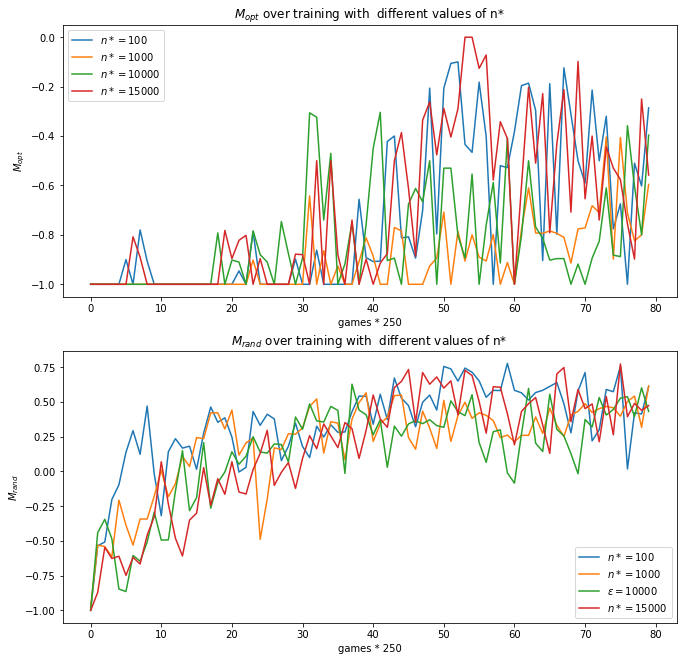

In [18]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(11, 11))

ax1.plot(range(len(Mopt1)), Mopt1, label=r'$n*=${}'.format(100))
ax2.plot(range(len(Mrand1)), Mrand1, label=r'$n*=${}'.format(100))

ax1.plot(range(len(Mopt2)), Mopt2, label=r'$n*=${}'.format(1000))
ax2.plot(range(len(Mrand2)), Mrand2, label=r'$n*=${}'.format(1000))

ax1.plot(range(len(Mopt3)), Mopt3, label=r'$n*=${}'.format(10000))
ax2.plot(range(len(Mrand3)), Mrand3, label=r'$\epsilon=${}'.format(10000))

ax1.plot(range(len(Mopt4)), Mopt4, label=r'$n*=${}'.format(15000))
ax2.plot(range(len(Mrand4)), Mrand4, label=r'$n*=${}'.format(15000))


ax1.legend()
ax2.legend()
ax1.set_title(r'$M_{opt}$ over training with  different values of n*')
ax1.set_xlabel('games * 250')
ax1.set_ylabel('$M_{opt}$')
ax2.set_title(r'$M_{rand}$ over training with  different values of n*')
ax2.set_xlabel('games * 250')
ax2.set_ylabel('$M_{rand}$')

# Question 18

In question 16, the highest value for $M_{opt}$ is achieved by a network trained with a constant $\epsilon = 0.1$, that obtains a value $M_{opt} \approx 0$. However, This value is obtained after about 10000 games, and then decreases.
The same agent achieves a value $M_{rand} \approx 0.75$ at the same time it achieves its hoghest $M_{opt}$ value. However, while $M_{opt}$ decreases, it is able to maintain a relatively high $M_{rand}$ value

# Question 19

Here, we make a simple sanity check that the network takes sensible actions for some board arrangements :

In [19]:
self_learner = SelfLearner(target_network_update=500, eps_min=0.1, eps_max=0.1, decaying_time = 1)
env.reset()
_, _, _, _, _ = self_learner.train(number_games=20000, env=env, evaluate=True)

X turn
[[ 1.  0.  1.]
 [-1.  0.  0.]
 [-1.  0.  0.]]


C:\Users\noam\AppData\Local\Temp\ipykernel_76944\3821257839.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


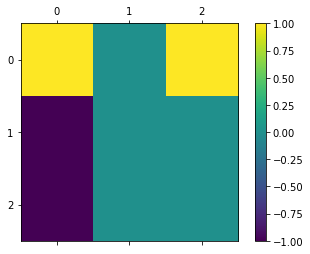

In [39]:
state = np.array([[1., 0., 1.], [-1., 0., 0.], [-1., 0., 0.]])
figure = plt.figure()
axes = figure.add_subplot(111)
matrix_axes = axes.matshow(state)
figure.colorbar(matrix_axes)
figure.show()

print('X turn')
print(state)

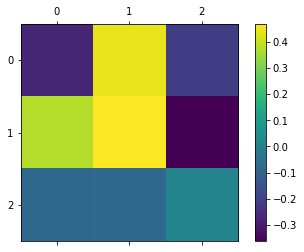

In [40]:
self_learner.showQValues(state)

X turn
[[ 1.  0.  1.]
 [-1. -1.  0.]
 [ 0.  0.  0.]]


C:\Users\noam\AppData\Local\Temp\ipykernel_76944\4155630926.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


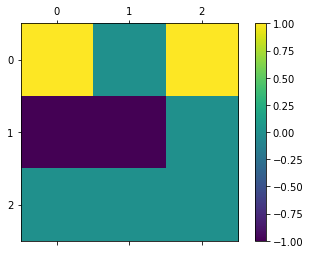

In [41]:
state = np.array([[1., 0., 1.], [-1, -1., 0.], [0., 0., 0.]])
figure = plt.figure()
axes = figure.add_subplot(111)
matrix_axes = axes.matshow(state)
figure.colorbar(matrix_axes)
figure.show()

print('X turn')
print(state)

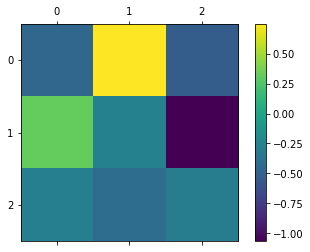

In [42]:
self_learner.showQValues(state)

X turn
[[ 1. -1.  1.]
 [ 0. -1.  1.]
 [ 0.  0.  0.]]


C:\Users\noam\AppData\Local\Temp\ipykernel_76944\1522579226.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


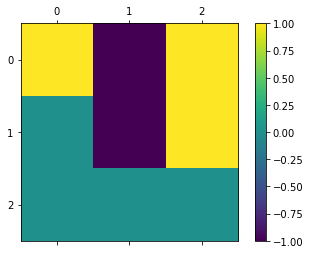

In [43]:
state = np.array([[1., -1., 1.], [0., -1., 1.], [0., 0., 0.]])
figure = plt.figure()
axes = figure.add_subplot(111)
matrix_axes = axes.matshow(state)
figure.colorbar(matrix_axes)
figure.show()

print('X turn')
print(state)

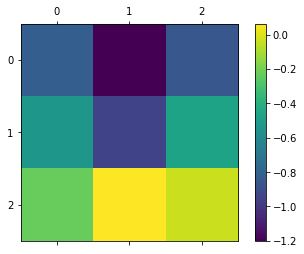

In [44]:
self_learner.showQValues(state)

On these figures, we can observe that the agent seems to take sensible decisions. Even when the action taken is the wrong one, the correct action still has a very high Q value, and the chosen action is not a loosing move.